In [2]:
import numpy as np 
import pandas as pd
import matplotlib as plt


# preparazione dati

- rimuovere istanze con poche features  popolate
- onehot encoding 
- plot singole features
- features subset selection 


In [6]:

data = pd.read_csv("../data/train.csv")
data

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


In [12]:
Y = data['sii']
Y

0       2.0
1       0.0
2       0.0
3       1.0
4       NaN
       ... 
3955    1.0
3956    NaN
3957    1.0
3958    0.0
3959    NaN
Name: sii, Length: 3960, dtype: float64

rimossi sii e id

In [13]:
X = data.drop(columns=['id','sii'])
print("X shape", X.shape)

X shape (3960, 80)


In [14]:
from sklearn.model_selection import train_test_split

# slip train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

# split train & val 
X_train,X_val , y_train, y_val = train_test_split(
    X_train,y_train,test_size = 0.2,random_state=42
)

In [ ]:
X_train

(2534, 80)

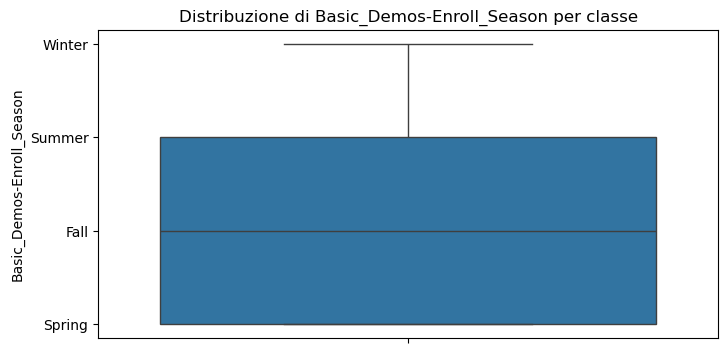

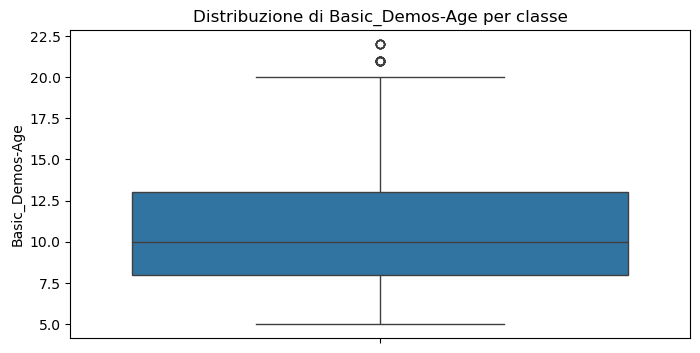

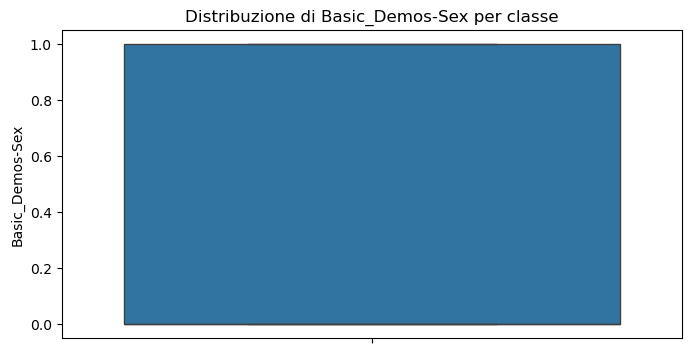

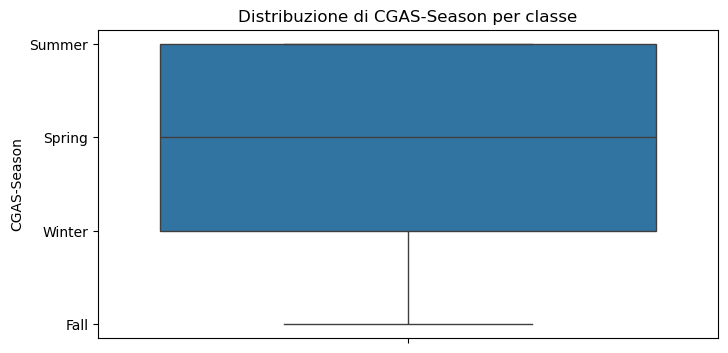

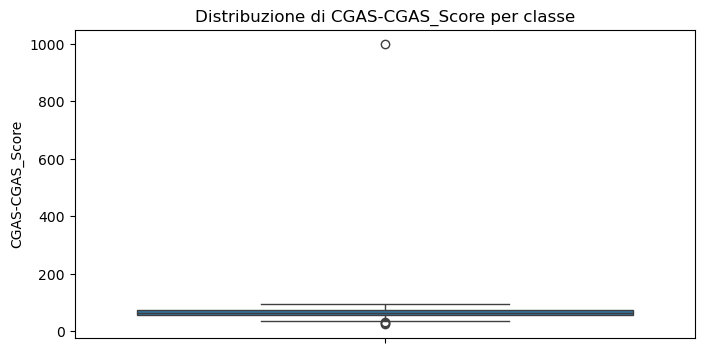

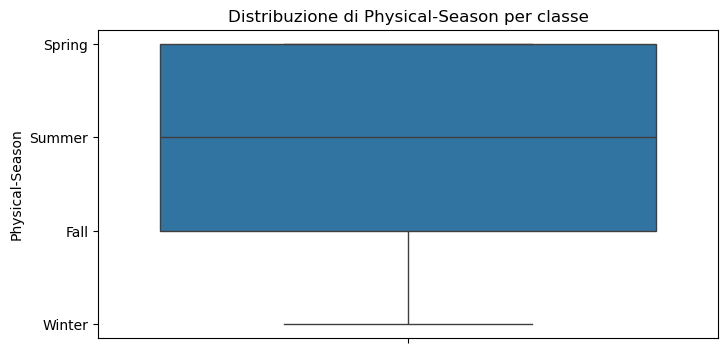

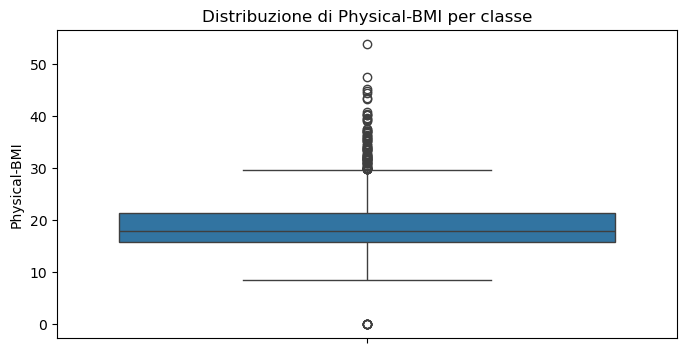

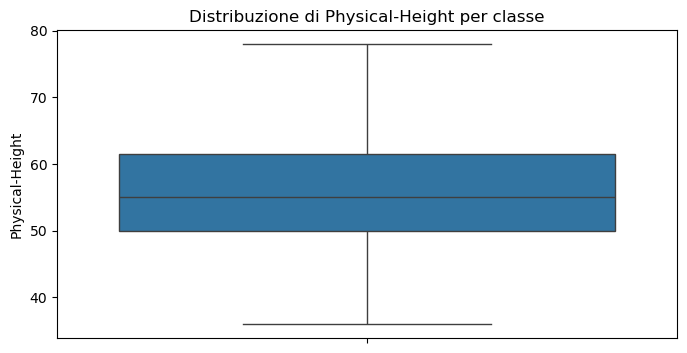

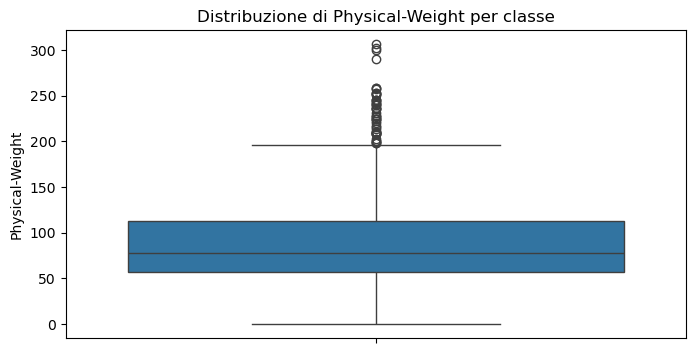

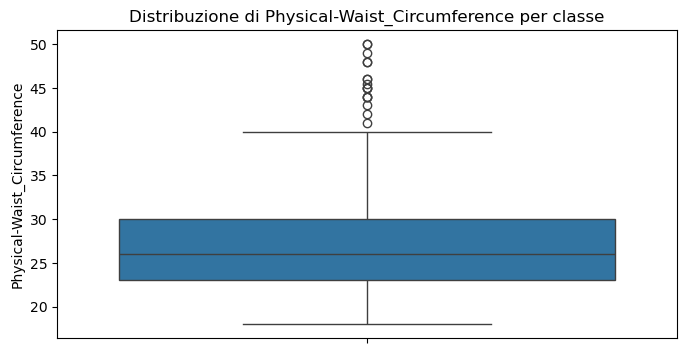

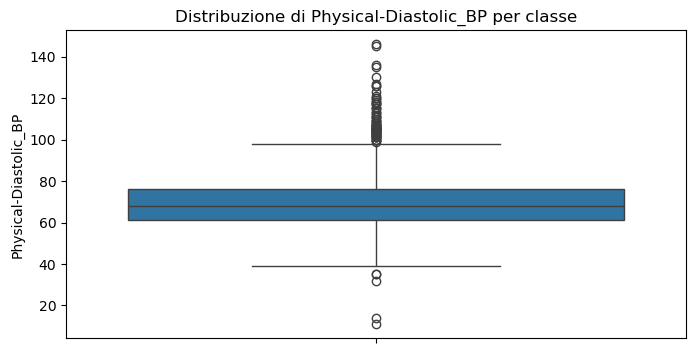

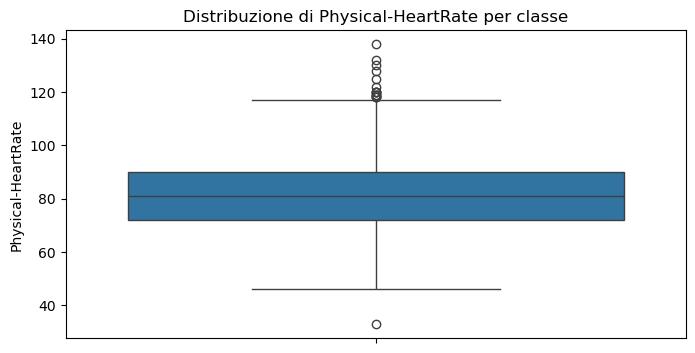

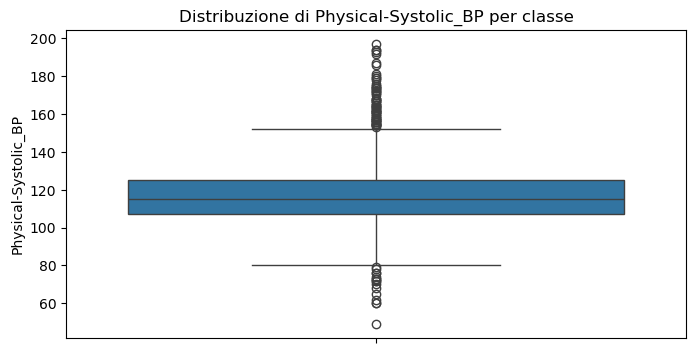

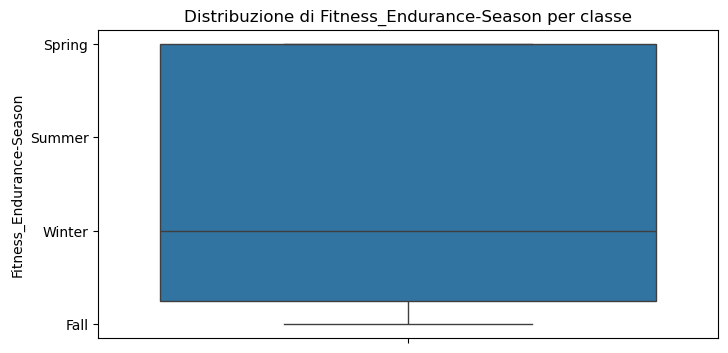

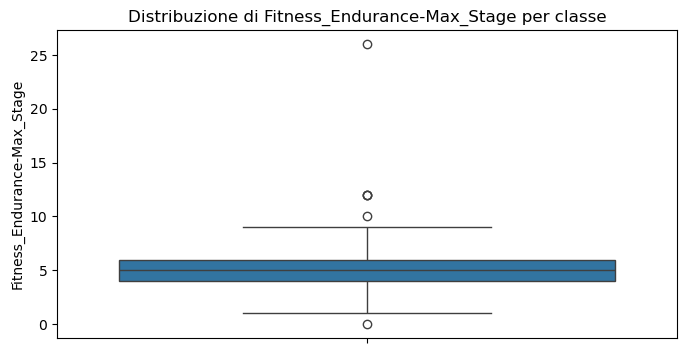

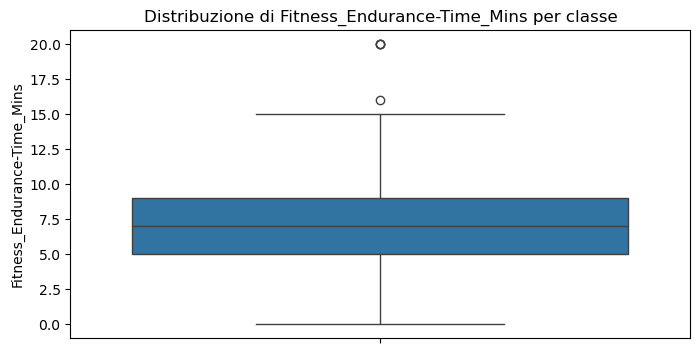

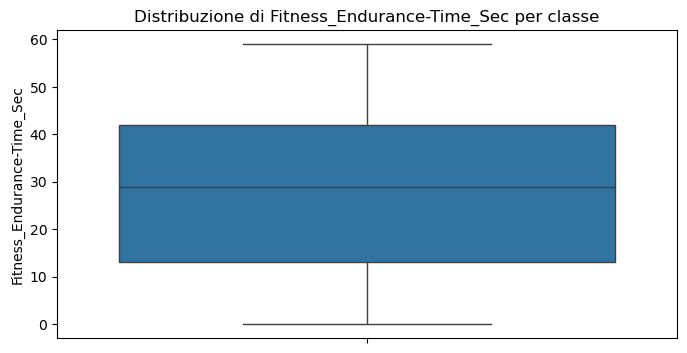

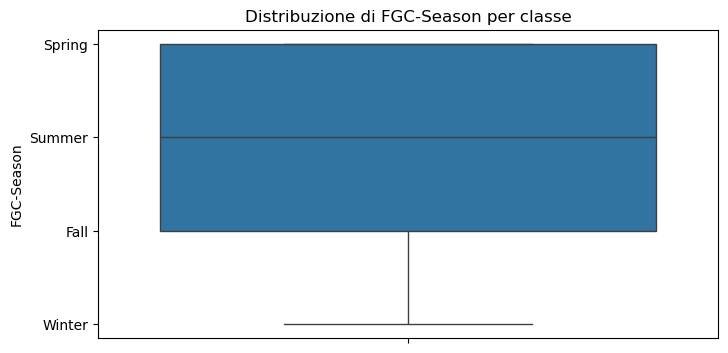

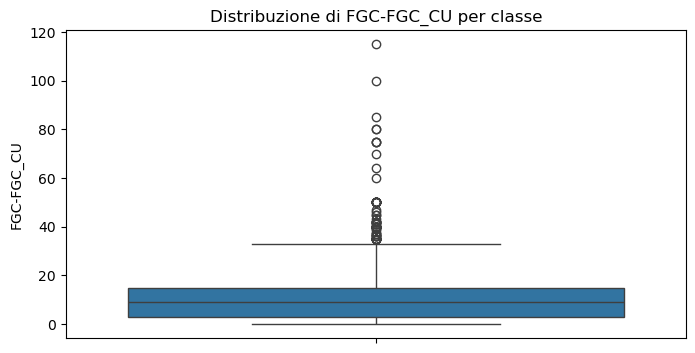

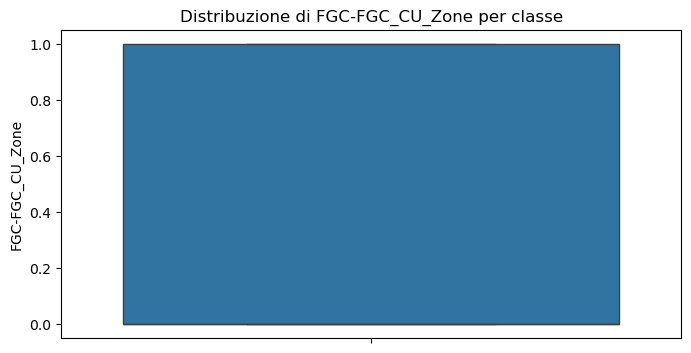

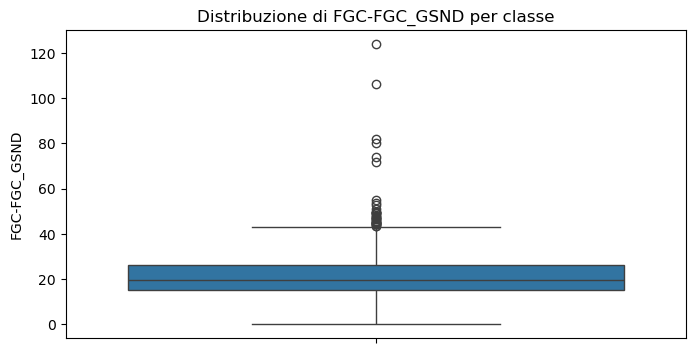

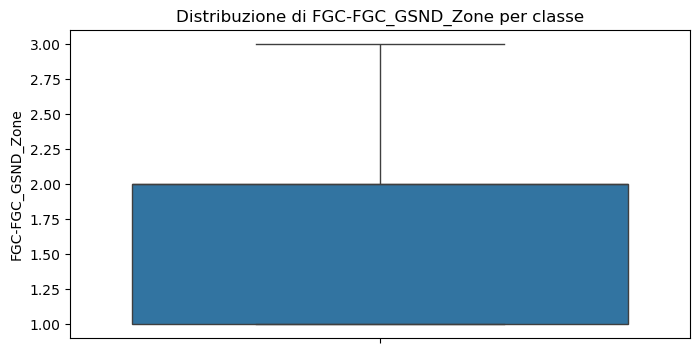

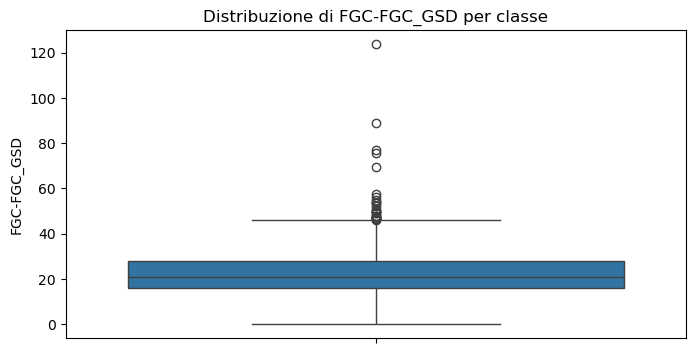

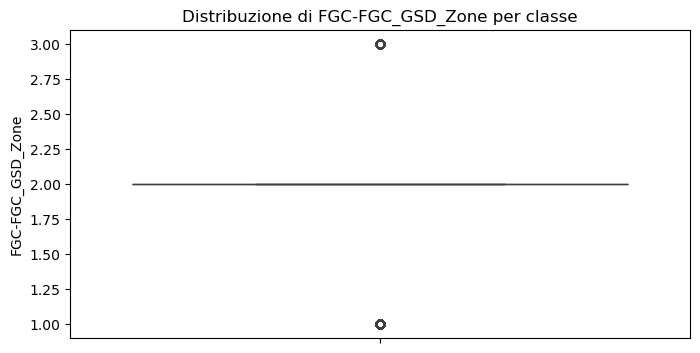

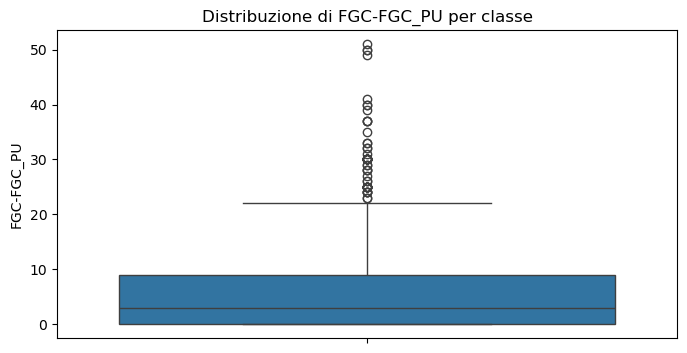

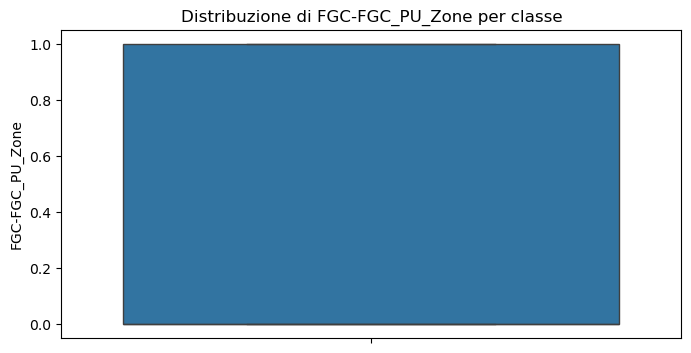

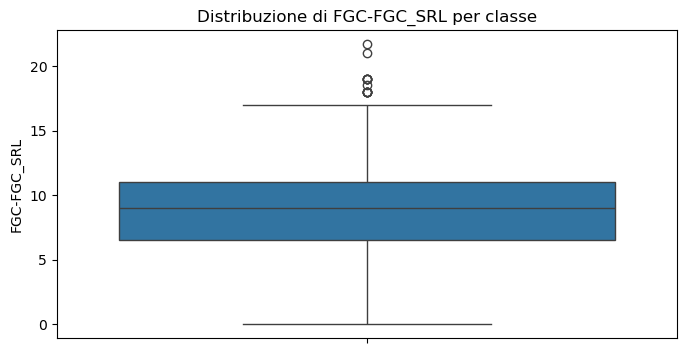

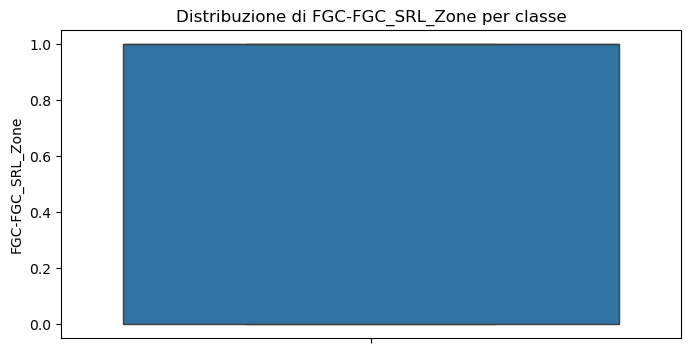

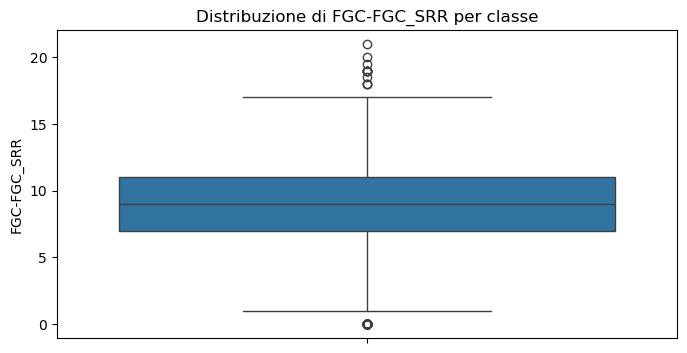

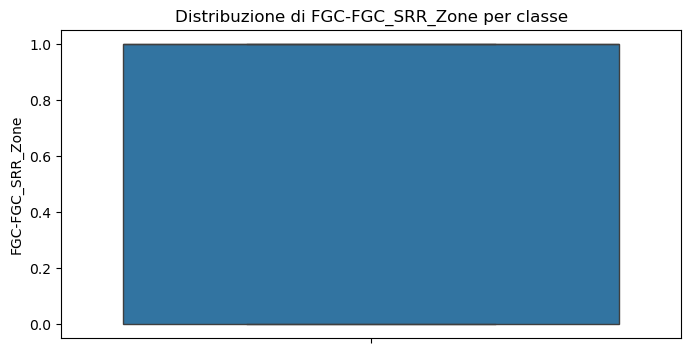

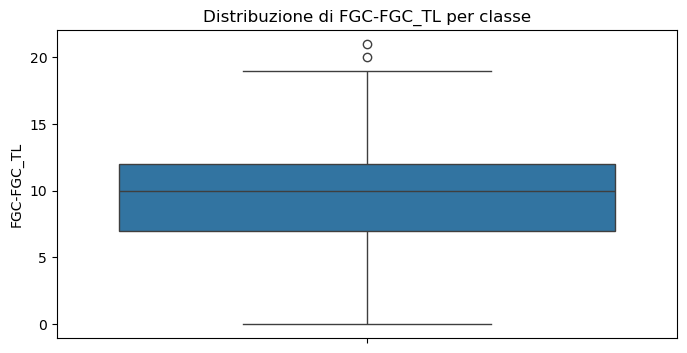

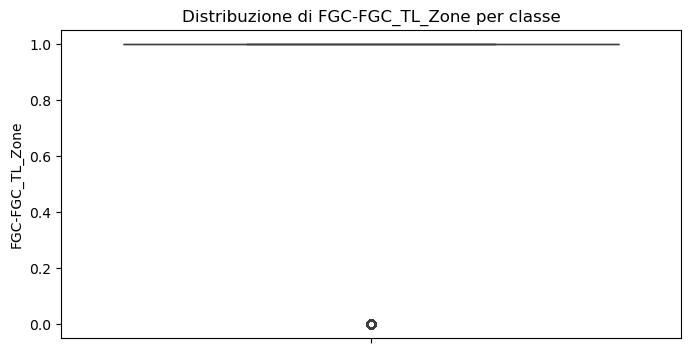

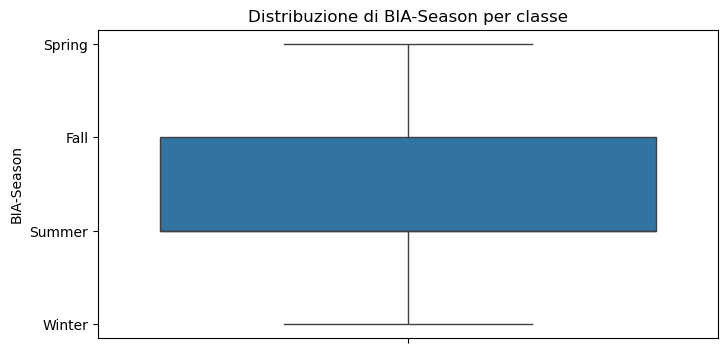

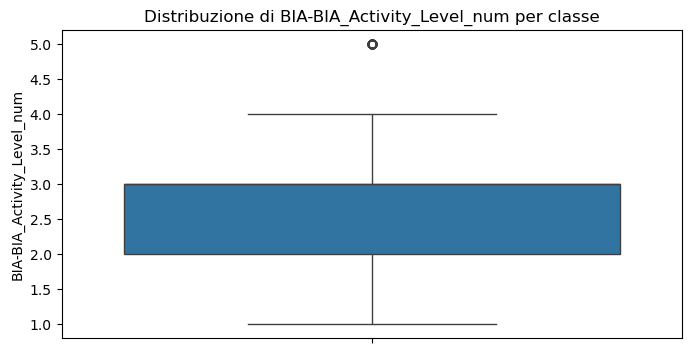

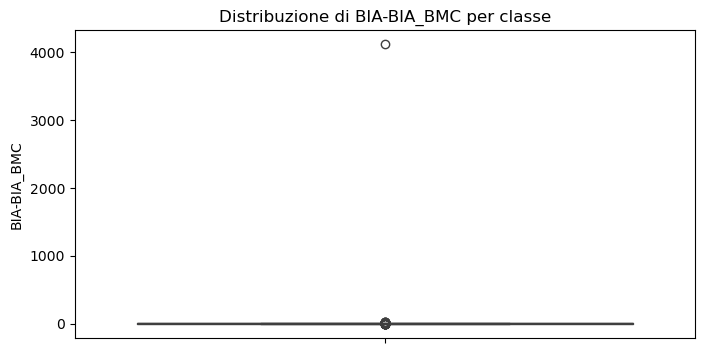

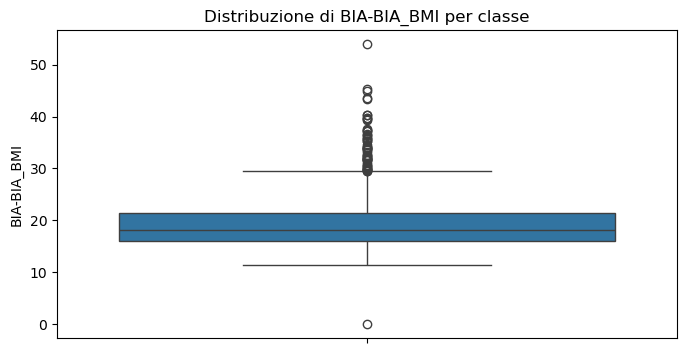

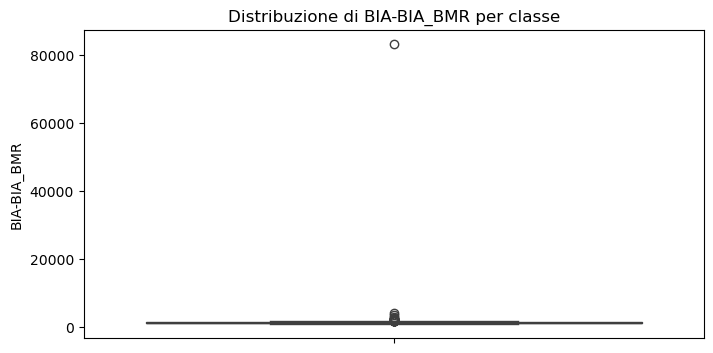

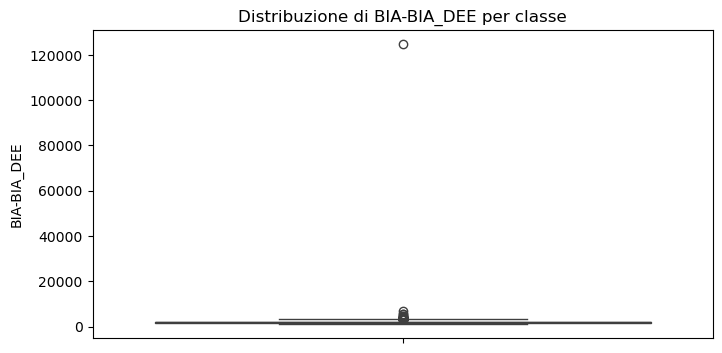

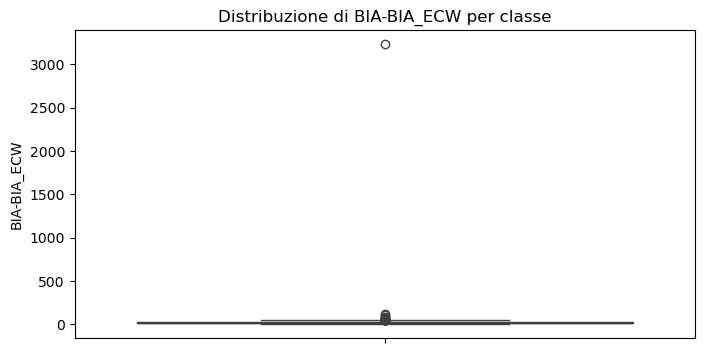

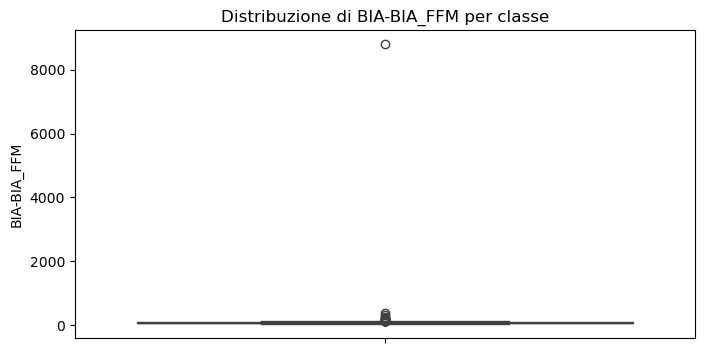

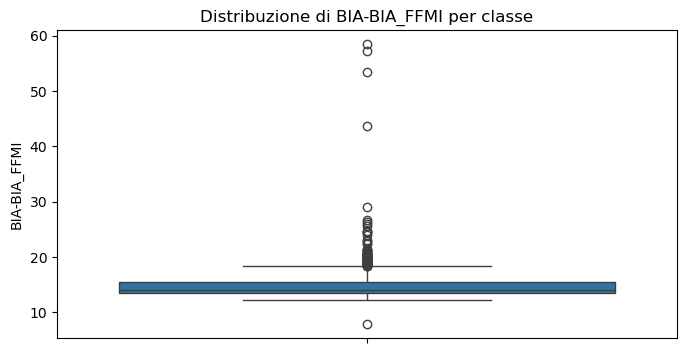

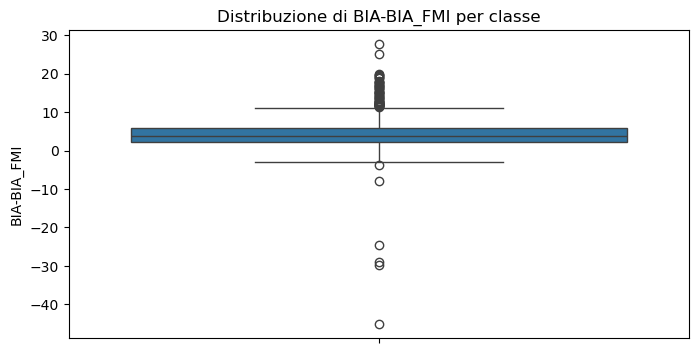

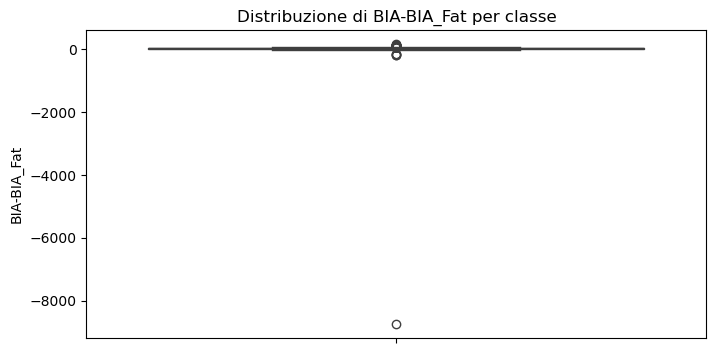

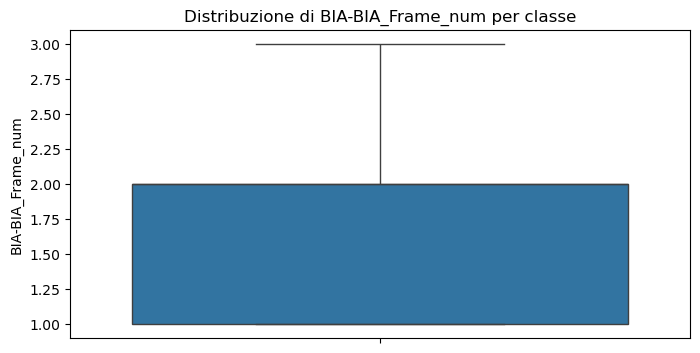

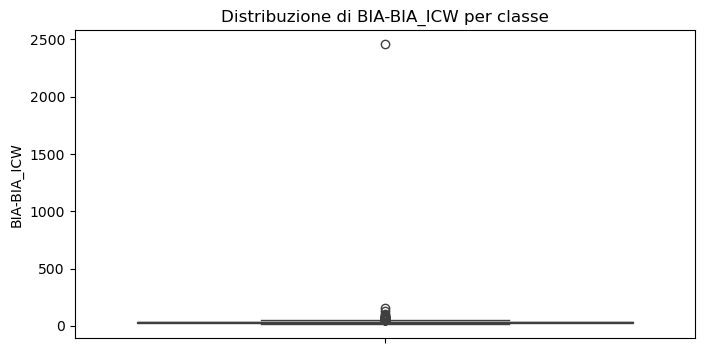

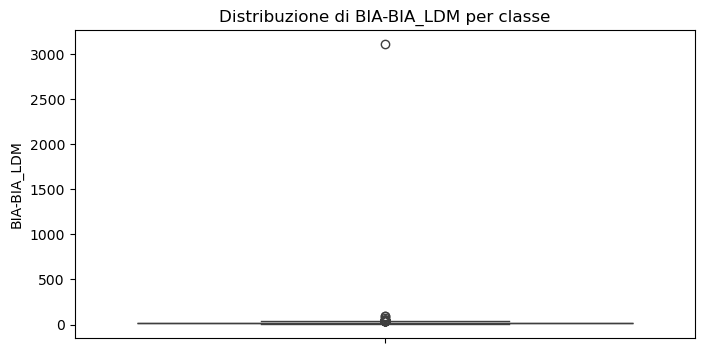

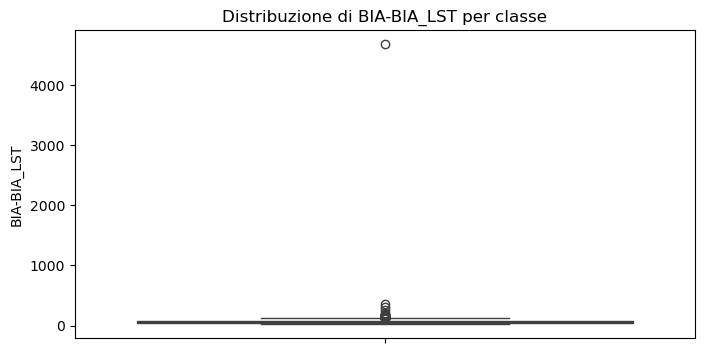

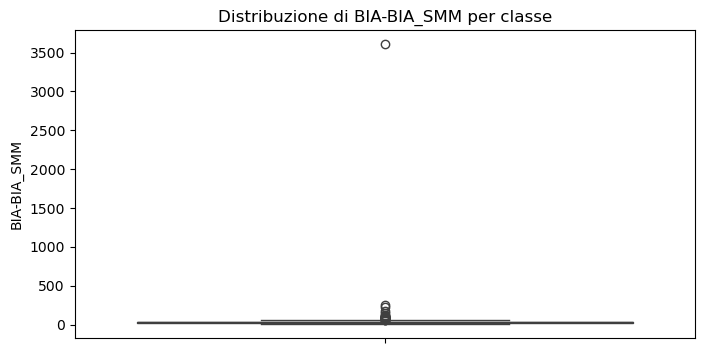

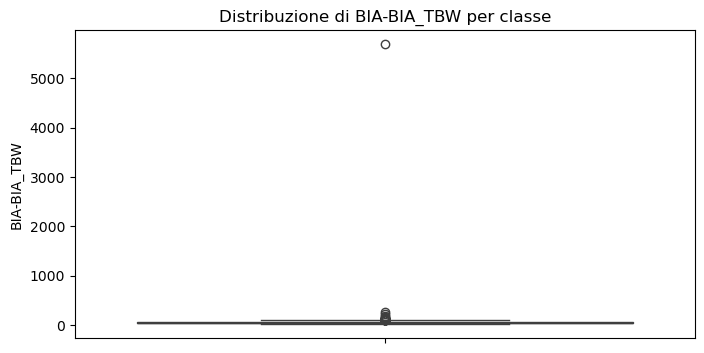

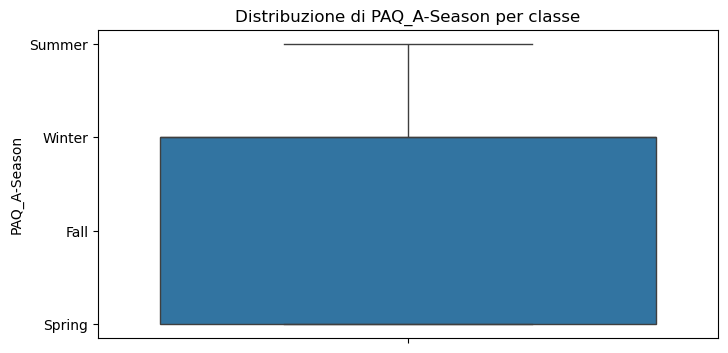

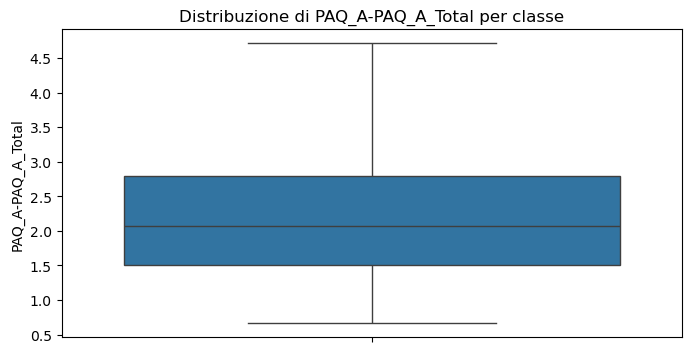

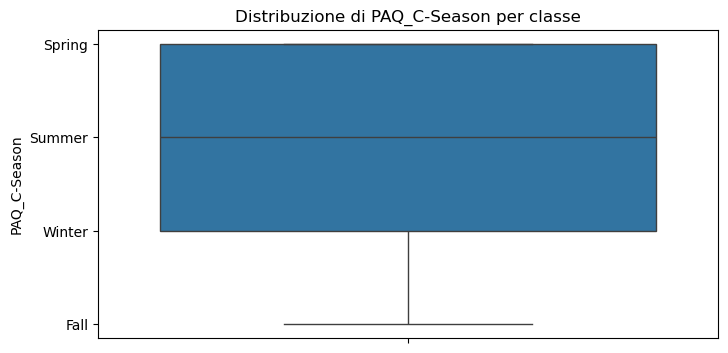

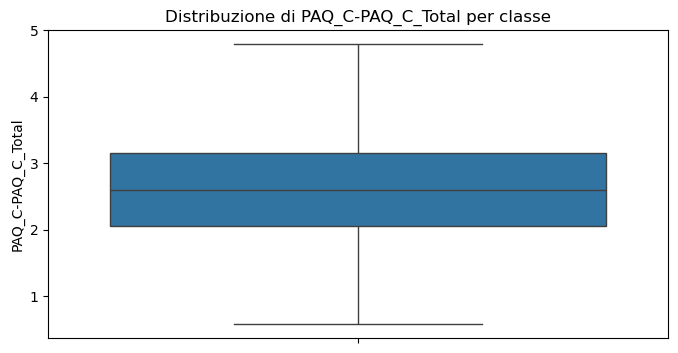

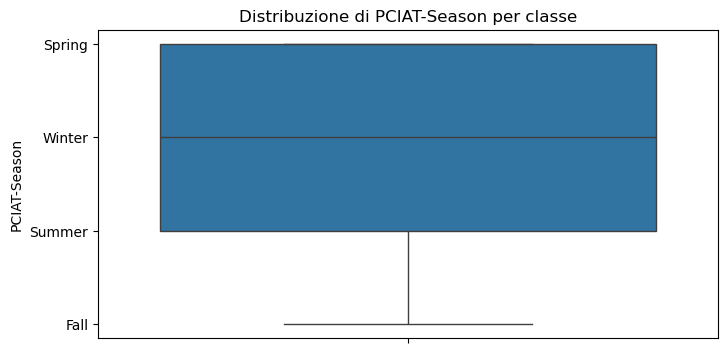

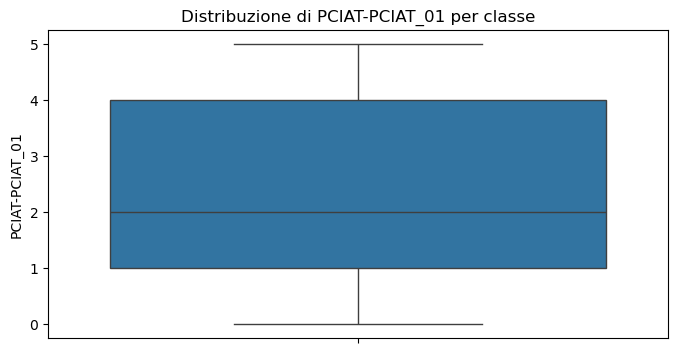

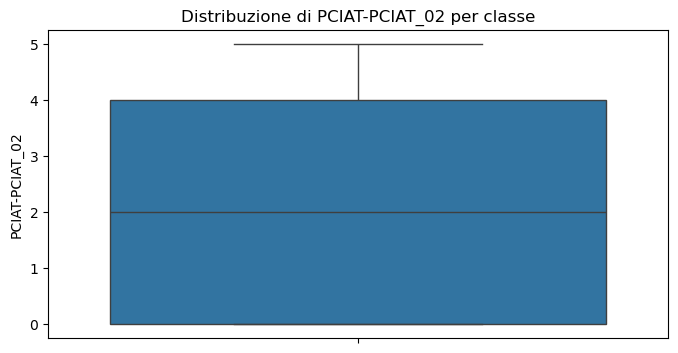

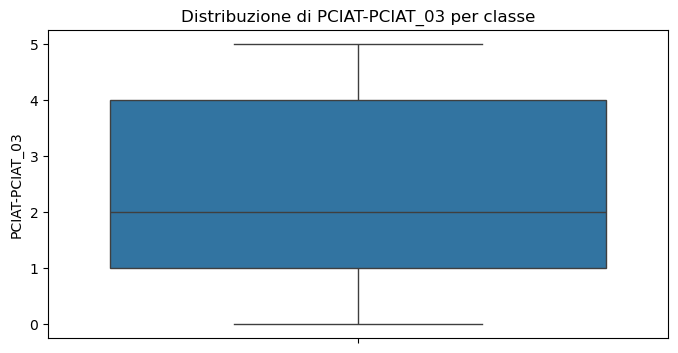

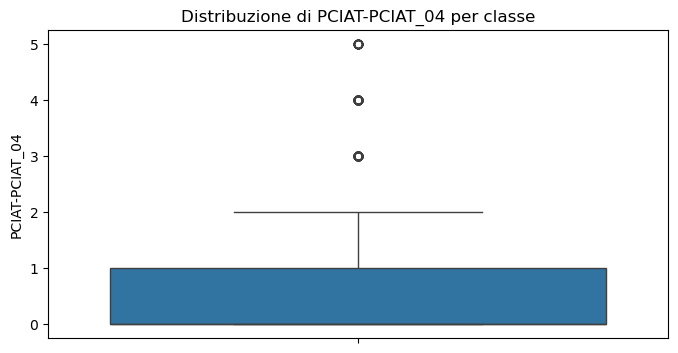

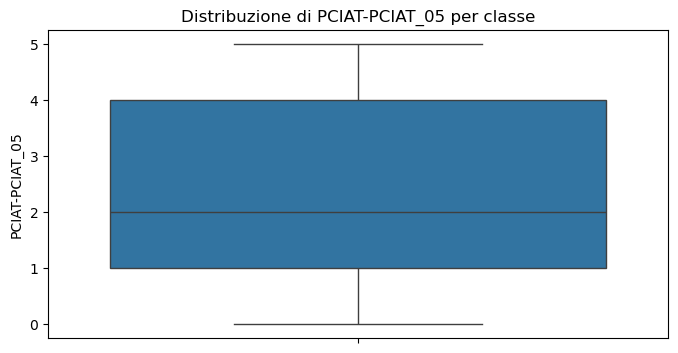

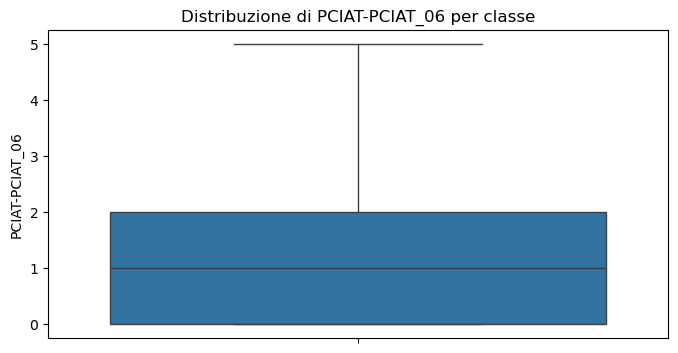

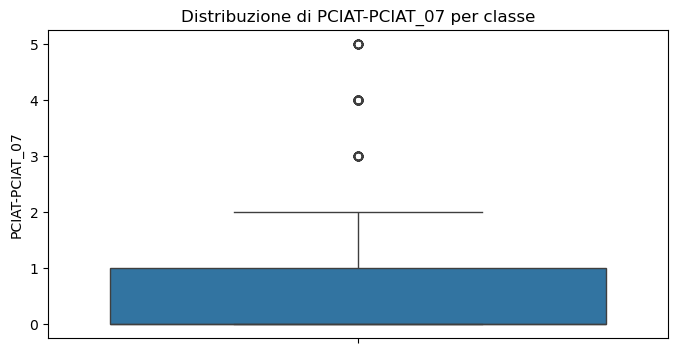

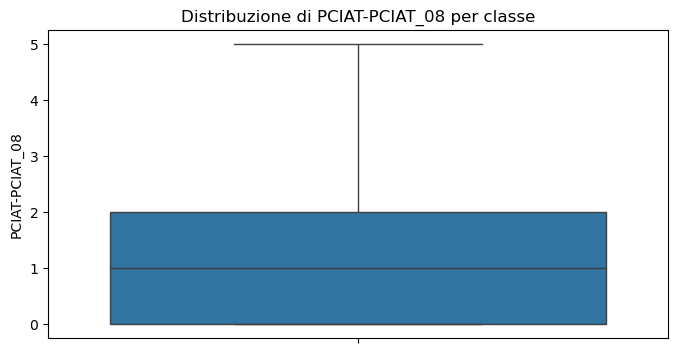

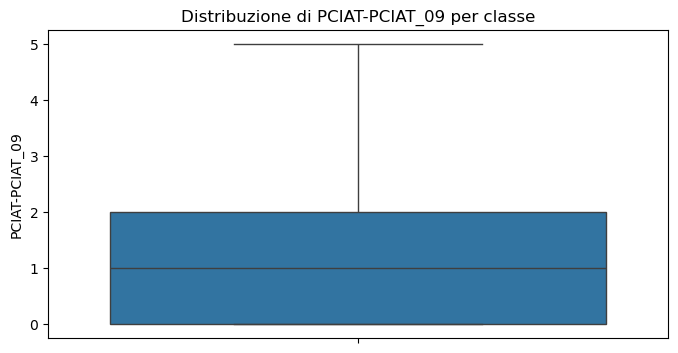

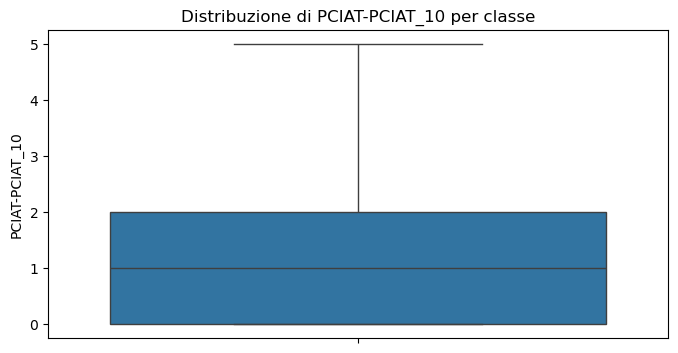

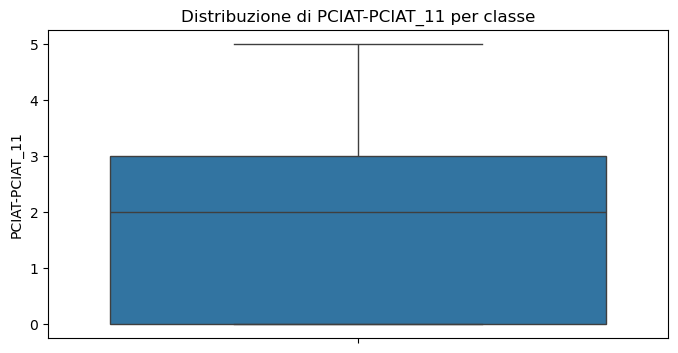

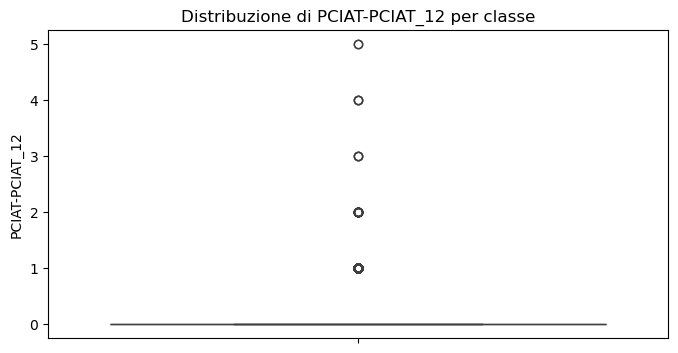

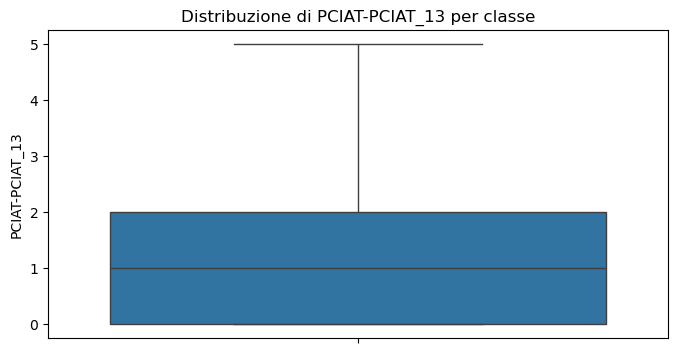

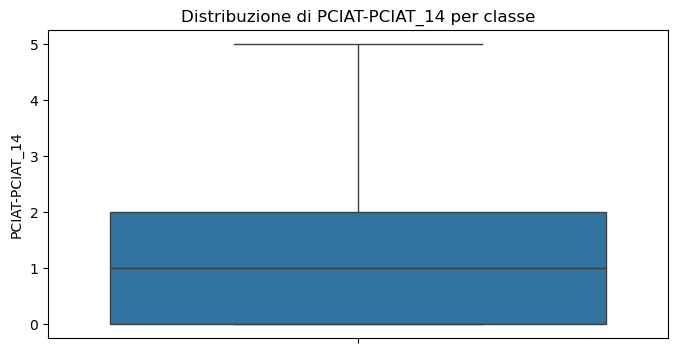

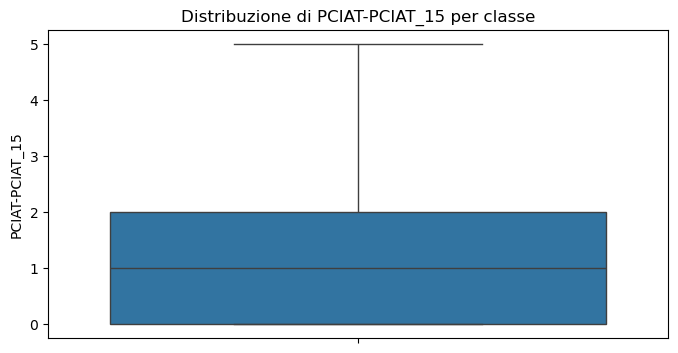

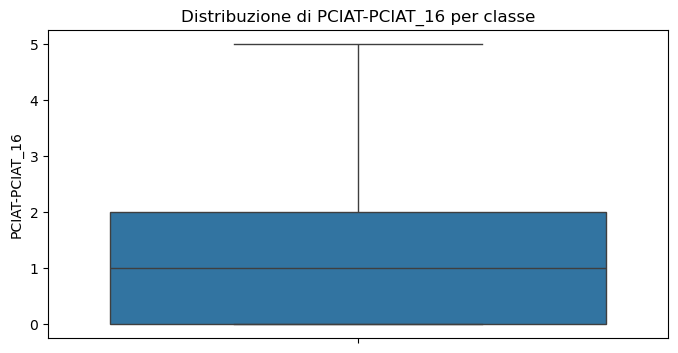

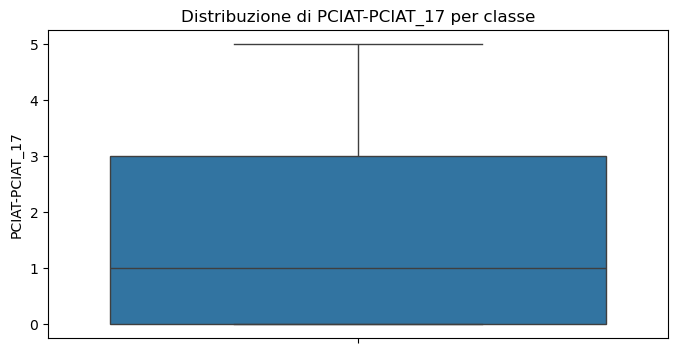

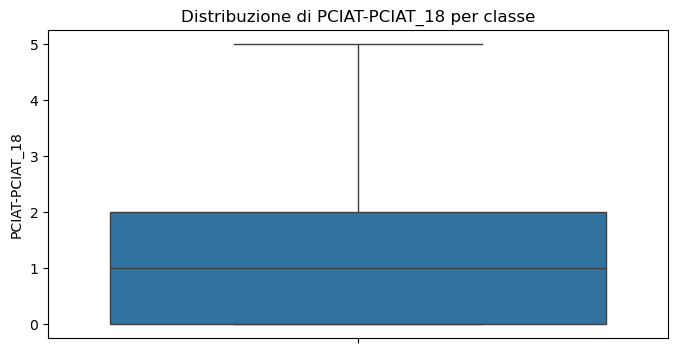

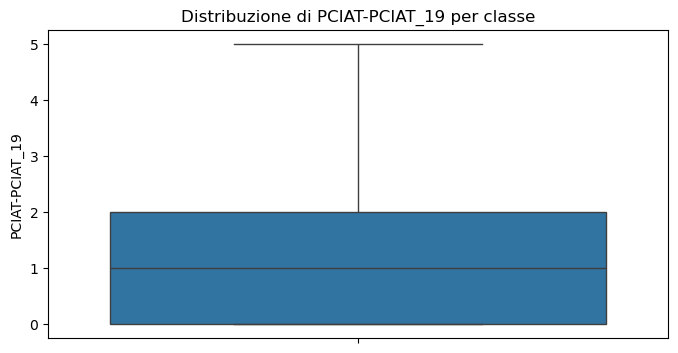

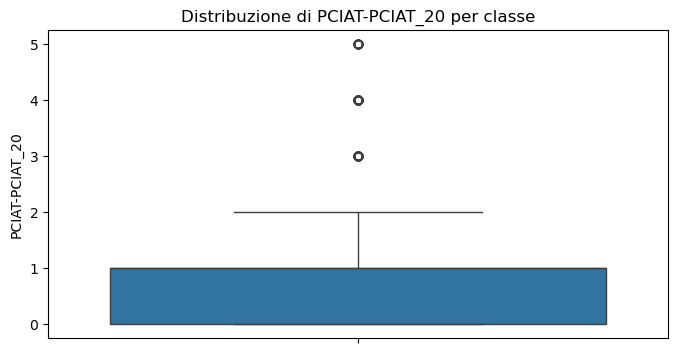

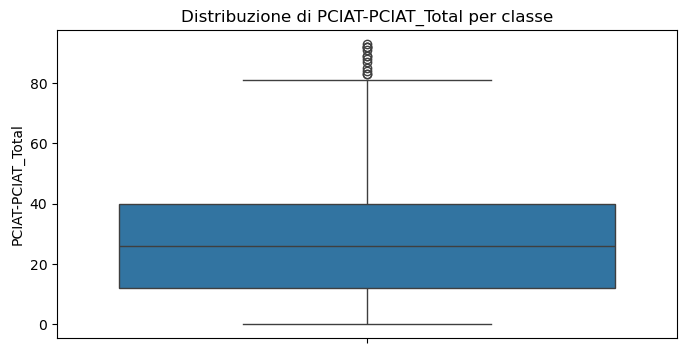

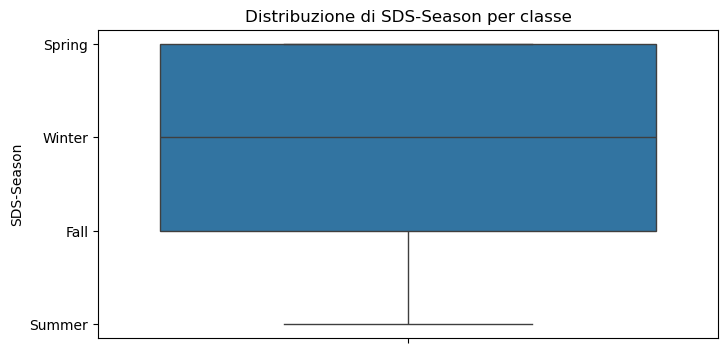

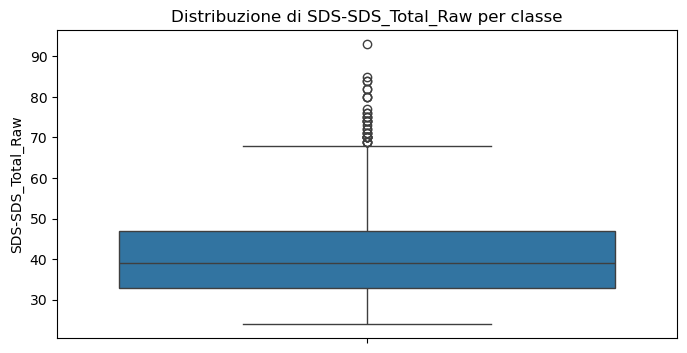

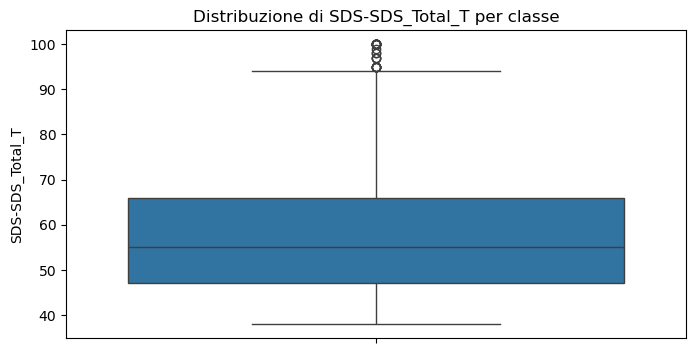

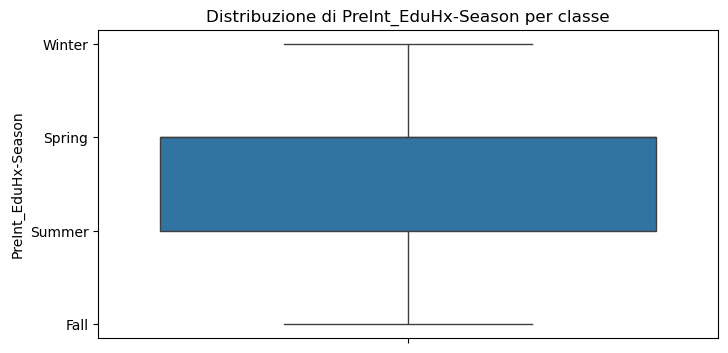

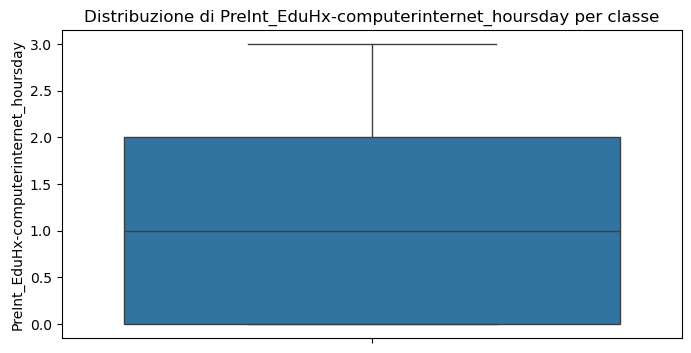

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

features = [col for col in X_train.columns if col != 'label']

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=feature, data=X_train)
    plt.title(f'Distribuzione di {feature} per classe')
    plt.show()





In [ ]:
from sklearn.feature_selection import mutual_info_classif

y_train_index = y_train.where(y_train != np.nan)

y_train_index


#mi = mutual_info_classif(X_train, y_train, discrete_features='auto')

#mi_df = pd.Series(mi, index=X_train.columns).sort_values(ascending=False)
#mi_df.plot(kind='bar', title='Mutual Information con la classe')
#plt.show()

1611    0.0
1516    0.0
851     1.0
2142    NaN
1484    NaN
       ... 
2945    0.0
1208    0.0
2285    0.0
3083    1.0
3250    NaN
Name: sii, Length: 2534, dtype: float64